# Dacon: credit card delinquency

In [2]:
# index
# gender: 성별
# car: 차량 소유 여부
# reality: 부동산 소유 여부
# child_num: 자녀 수
# income_total: 연간 소득
# income_type: 소득 분류
# 							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
# edu_type: 교육 수준
# 							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
# family_type: 결혼 여부
# 							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
# house_type: 생활 방식
# 							['Municipal apartment', 'House / apartment', 'With parents',
# 							 'Co-op apartment', 'Rented apartment', 'Office apartment']
# DAYS_BIRTH: 출생일
# 							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
# DAYS_EMPLOYED: 업무 시작일
# 							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
# 							양수 값은 고용되지 않은 상태를 의미함
# FLAG_MOBIL: 핸드폰 소유 여부
# work_phone: 업무용 전화 소유 여부
# phone: 전화 소유 여부
# email: 이메일 소유 여부
# occyp_type: 직업 유형													
# family_size: 가족 규모
# begin_month: 신용카드 발급 월
# 							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미


# credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
# 							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함



In [58]:
from os.path import join


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
%ls data/Credit_card

sample_submission.csv  test.csv               train.csv


----
## Load Data

In [5]:
path = "./data/Credit_card/"

data = pd.read_csv(join(path, "train.csv"))
test = pd.read_csv(join(path, "test.csv"))

del data["index"], test["index"]

In [6]:
target_column = list(set(data.columns) - set(test.columns))
print(target_column)

target = data[target_column[0]].copy()

del data[target_column[0]]

data.shape, test.shape, target.shape


['credit']


((26457, 18), (10000, 18), (26457,))

-----

### EDA

In [7]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0


In [8]:
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [9]:
data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [10]:
test.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


#### dtypes
data: dtypes: float64(3), int64(7), object(8)<br> test: dtypes: float64(3), int64(7), object(8)

<br>occyp_type(NA included column)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
dtypes: flo

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes: floa

#### no. NA

In [13]:
data.isna().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
dtype: int64

In [14]:
test.isna().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

#### column: DAYS_EMPLOYED, FLAG_MOBIL
DAYS_EMPLOYED feature의 양수 값은 무직인 사람을 의미 하지만 365243으로 너무 큰 값을 가지고 있다고 판단, 추후 0 이상인 값을 모두 0으로 대체
DAYS_EMPLOYED feature의 경우 모든 로우가 동일 값을 가지고 있으므로 전처리과정에서 제거


### 강사 피드백
- 좋은 인사이트네요. 실제로 대회에서도 작성하신 것과 같은 흐름으로 EDA 및 전처리를 진행합니다.

In [15]:
data.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month'],
      dtype='object')

In [14]:
data[data["DAYS_EMPLOYED"] > 0]["DAYS_EMPLOYED"].value_counts()

365243    4438
Name: DAYS_EMPLOYED, dtype: int64

<AxesSubplot:xlabel='child_num', ylabel='Density'>

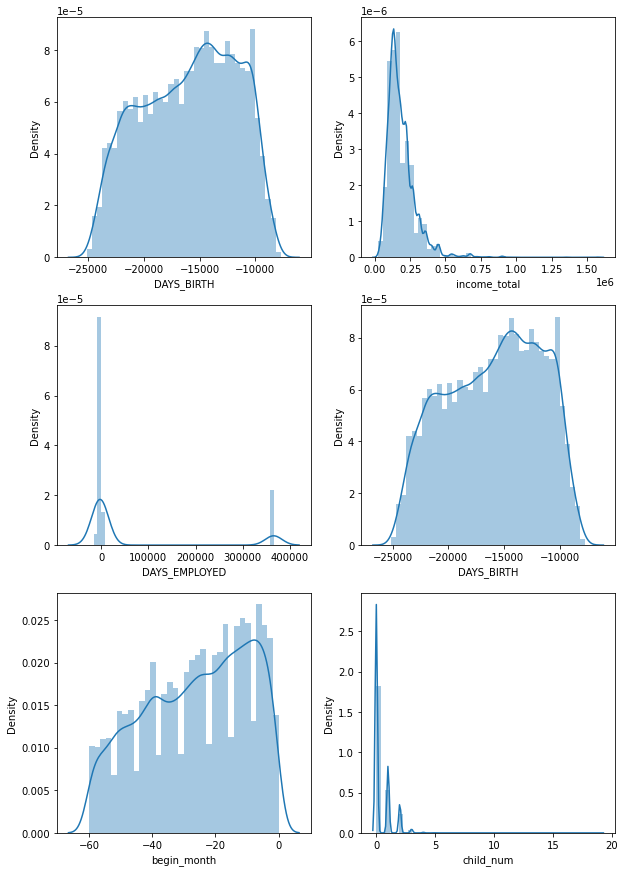

In [65]:
fig, axes = plt.subplots(3,2, figsize = (10,15), sharex = False)
sns.distplot(data["DAYS_BIRTH"], ax = axes[0,0])
sns.distplot(data["income_total"], ax = axes[0,1])
sns.distplot(data["DAYS_EMPLOYED"], ax = axes[1,0])
sns.distplot(data["DAYS_BIRTH"], ax = axes[1,1])
sns.distplot(data["begin_month"], ax = axes[2,0])
sns.distplot(data["child_num"], ax = axes[2,1])

### 강사 피드백
- 단순하게 보기에는 incom_total, child_num 컬럼등에 log transformation을 통해 분포를 조정해줄 수 있겠습니다.

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

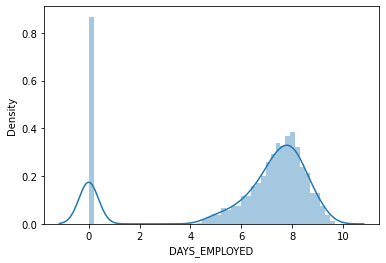

In [66]:
g_data = data.copy()
g_data["DAYS_EMPLOYED"] = g_data["DAYS_EMPLOYED"].apply(lambda x: 0 if x >= 0 else x*-1)
sns.distplot(np.log1p(g_data["DAYS_EMPLOYED"]))

<AxesSubplot:xlabel='income_total', ylabel='Density'>

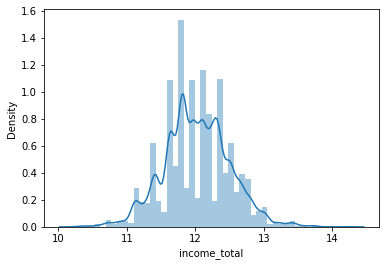

In [78]:
sns.distplot(np.log(g_data["income_total"]))

#### target value의 비율
credit: 
낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [77]:
pd.Series(target).value_counts() / data.shape[0]

2    0.641343
1    0.236875
0    0.121783
dtype: float64

### 강사 피드백
- 분류 문제에서는 반드시 클래스의 비율을 확인하는 습관 좋습니다.

---

### 데이터 전처리

##### FLAG_MOBIL, work_phone, phone, email
* 위 feature들은 이미  categorized

##### DAYS_EMPLOYED 값 변경
* 0 이상은 모두 0으로 대체하고 값 전체를 음수에서 양수로 변경

##### FLAG_MOBIL feature 제거
* 해당 변수의 경우 모든 row가 1값을 가짐 따라서 변수 제거 무의미하다고 판단.

##### occyp_type feature
* 해당 변수의 경우 NA값으로 들어가 있는 것도 유의한 정보일 수 있기 때문에 unknown으로 대체

### 강사 피드백
- 맞습니다. 결측치가 의미를 가지고 있는 경우도 있습니다. 이 부분을 항상 유념하시면 좋겠습니다.

In [22]:
# 해당 변수들은 소유 여부로 category feature로 판단, 해당 변수들의 value 확인
data["email"].value_counts()#,"FLAG_MOBIL" "work_phone", "phone","email"]].value_counts()
test["email"].value_counts()

0    9144
1     856
Name: email, dtype: int64

In [17]:
##### FLAG_MOBIL feature의 경우 모든 row가 1값을 가짐 따라서 변수 제거 무의미하다고 판단.
print(len(data) == data["FLAG_MOBIL"].sum())
print(len(test) == test["FLAG_MOBIL"].sum())

# data = data.drop("FLAG_MOBIL", axis = 1)
# test = test.drop("FLAG_MOBIL", axis = 1)


True
True


##### num_columns, cat_columns

In [23]:
###### data: dtypes: float64(3), int64(7), object(8)
###### test: dtypes: float64(3), int64(7), object(8)
cat_col = data.select_dtypes(include = "object").columns.to_list()
print(cat_col == test.select_dtypes(include = "object").columns.to_list())
num_col = data.select_dtypes(exclude = "object").columns.to_list()
print(cat_col)
print("---"*30)
print(num_col)
print(len(num_col)+len(cat_col))

True
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']
------------------------------------------------------------------------------------------
['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']
18


In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, LabelEncoder, RobustScaler

def change_value(df):
    
    df = df.drop("FLAG_MOBIL", axis = 1)
    df["car"] = df["car"].replace({"N":"car_N", "Y":"car_Y"}) # one-hot encoding시 ohe.category_로 변수이름을 부여할 때 겹치므로 변경
    df["reality"] = df["reality"].replace({"N":"reality_N", "Y":"reality_Y"}) 
#     df["Hired"] = df["DAYS_EMPLOYED"].apply(lambda x: 1 if x < 1 else 0)
#     df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].apply(lambda x: 0 if x >= 0 else x)
    df["occyp_type"] = df["occyp_type"].fillna("unknown")
    df["DAYS_BIRTH"] = df["DAYS_BIRTH"] * -1 # values 양수화
    df["begin_month"] = df["begin_month"] * -1 # values 양수화
    df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].apply(lambda x: 0 if x >= 0 else x*-1)
    return df

def log_scale(df):
    df["DAYS_EMPLOYED"] = np.log1p(df["DAYS_EMPLOYED"])
    df["income_total"] = np.log1p(df["income_total"])
    return df

def preprocess(X_train, X_valid, X_test):
    X_train_tmp = X_train.copy()
    X_valid_tmp = X_valid.copy()
    X_test_tmp = X_test.copy()
    
    X_train_tmp = X_train_tmp.reset_index(drop = True)
    X_valid_tmp = X_valid_tmp.reset_index(drop = True)
    X_test_tmp = X_test_tmp.reset_index(drop = True)
    
    X_train_tmp = change_value(X_train_tmp)
    X_valid_tmp = change_value(X_valid_tmp)
    X_test_tmp = change_value(X_test_tmp)
    
    
    # num_columns sd scaling
    cat_columns = X_train_tmp.select_dtypes(include="object").columns.to_list()
    num_columns = X_train_tmp.select_dtypes(exclude= "object").columns.to_list()
    
    col_to_log = ["DAYS_EMPLOYED", "income_total"]
    categorized_col = ["work_phone", "phone","email"]
    col_to_sd = list(set(num_columns) - set(col_to_log) - set(categorized_col))
    

#     rbscaler = RobustScaler()
    sdscaler = StandardScaler()
#     minmax_scaler = MinMaxScaler()
    
#     X_train_tmp[num_columns] = rbscaler.fit_transform(X_train_tmp[num_columns])
#     X_valid_tmp[num_columns] = rbscaler.transform(X_valid_tmp[num_columns])
#   
#     X_test_tmp[num_columns] = rbscaler.transform(X_test_tmp[num_columns])
#     X_train_tmp[col_minmax] = minmax_scaler.fit_transform(X_train_tmp[col_minmax])
#     X_valid_tmp[col_minmax] = minmax_scaler.transform(X_valid_tmp[col_minmax])
#     X_test_tmp[col_minmax] = minmax_scaler.transform(X_test_tmp[col_minmax])
    
    
    
    X_train_tmp[col_to_sd] = sdscaler.fit_transform(X_train_tmp[col_to_sd])
    X_valid_tmp[col_to_sd] = sdscaler.transform(X_valid_tmp[col_to_sd])
    X_test_tmp[col_to_sd] = sdscaler.transform(X_test_tmp[col_to_sd])
    
    
    X_train_tmp = log_scale(X_train_tmp)
    X_valid_tmp = log_scale(X_valid_tmp) 
    X_test_tmp = log_scale(X_test_tmp)

#   ----------------------------------------------------------------------------------
    # encoding 
    ohe = OneHotEncoder(sparse = False)
    concat = pd.concat([X_train_tmp, X_valid_tmp, X_test_tmp], axis = 0)
    ohe.fit(concat[cat_columns])
    
    print(X_train_tmp.shape)
    ohe_columns = []
    for col in ohe.categories_:
        ohe_columns += col.tolist()
        
    train_ohe = ohe.transform(X_train_tmp[cat_columns])
    valid_ohe = ohe.transform(X_valid_tmp[cat_columns])
    test_ohe = ohe.transform(X_test_tmp[cat_columns])
    print(X_train_tmp.shape)
    
    X_train_tmp = pd.concat([X_train_tmp, pd.DataFrame(train_ohe, columns= ohe_columns)], axis = 1)
    X_valid_tmp = pd.concat([X_valid_tmp, pd.DataFrame(valid_ohe, columns= ohe_columns)], axis = 1)
    X_test_tmp = pd.concat([X_test_tmp, pd.DataFrame(test_ohe, columns= ohe_columns)], axis = 1)
    
    print(X_train_tmp.shape)
    X_train_tmp = X_train_tmp.drop(cat_columns, axis = 1)
    X_valid_tmp = X_valid_tmp.drop(cat_columns, axis = 1)
    X_test_tmp = X_test_tmp.drop(cat_columns, axis = 1)
    
    

    
    return X_train_tmp, X_valid_tmp, X_test_tmp
    
le = LabelEncoder()
target = le.fit_transform(target)
    

### 강사 피드백
- EDA에 기반한 Feature Engineering 부분도 좋습니다. Log Transformation 진행하신 것도 보이네요. 프로세스가 전반적으로 좋습니다.

----

#### Testing functions

In [41]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, ytest = train_test_split(data, target, test_size=0.3,
                                                 stratify= target, random_state= 42, shuffle= True)

xtest = test.copy()


In [42]:
xtrain, xvalid, xtest = preprocess(xtrain, xvalid, xtest)

(18519, 17)
(18519, 17)
(18519, 63)


In [44]:
xtrain.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,F,...,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,unknown
0,-0.565335,11.967187,-1.378369,6.352629,0,0,0,-1.286842,0.827445,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.565335,11.547337,1.327989,8.355850,0,0,0,-0.206511,-1.100602,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.565335,11.967187,-0.463571,8.361942,1,0,0,-0.206511,0.164679,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.565335,12.100718,-0.717946,5.726848,1,1,0,-0.206511,1.429959,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.760078,11.119898,0.144552,8.847935,0,0,0,0.873821,0.224930,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-----

### LGBM 

In [54]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, log_loss



In [ ]:
#### 

In [79]:
n_splits = 5
skf = StratifiedKFold(n_splits, shuffle= True, random_state= 42)

oof_pred = np.zeros([test.shape[0], le.classes_.shape[0]])
logloss_score = []


for i, (trn_idx, val_idx) in enumerate(skf.split(data, target)):
    X_train, y_train = data.iloc[trn_idx,:], target[trn_idx]
    X_valid, y_valid = data.iloc[val_idx,:], target[val_idx]


    X_train, X_valid, X_test = preprocess(X_train, X_valid, test)

    model = LGBMClassifier(n_estimators = 1000,
                           objective= "multiclass",
                           n_jobs= -1,
                           random_state   = 42)

    model.fit(X_train, y_train,
              eval_set=[[X_train, y_train], [X_valid, y_valid]],
              eval_metric='multi_logloss',
              early_stopping_rounds=100,
              verbose=100)
    
    logloss_score.append(log_loss(y_valid, model.predict_proba(X_valid)))
    oof_pred += model.predict_proba(X_test) / n_splits
    
    print("Fold {0}, train logloss: {1}, valid logloss: {2}".format(i, 
                                                                    log_loss(y_train, model.predict_proba(X_train)),
                                                                    log_loss(y_valid, model.predict_proba(X_valid))))
    
    cv_loss = np.mean(logloss_score)
    
print("Cross Validation Score : {:.4f}".format(np.mean(cv_loss)))

(21165, 17)
(21165, 17)
(21165, 63)
Training until validation scores don't improve for 100 rounds
[100]	training's multi_logloss: 0.649422	valid_1's multi_logloss: 0.749508
[200]	training's multi_logloss: 0.565422	valid_1's multi_logloss: 0.734962
[300]	training's multi_logloss: 0.500884	valid_1's multi_logloss: 0.73033
[400]	training's multi_logloss: 0.450442	valid_1's multi_logloss: 0.729252
Early stopping, best iteration is:
[386]	training's multi_logloss: 0.456014	valid_1's multi_logloss: 0.728353
Fold 0, train logloss: 0.45601380179312856, valid logloss: 0.7283534003579331
(21165, 17)
(21165, 17)
(21165, 63)
Training until validation scores don't improve for 100 rounds
[100]	training's multi_logloss: 0.649573	valid_1's multi_logloss: 0.76394
[200]	training's multi_logloss: 0.561506	valid_1's multi_logloss: 0.749491
[300]	training's multi_logloss: 0.49726	valid_1's multi_logloss: 0.746923
Early stopping, best iteration is:
[294]	training's multi_logloss: 0.500647	valid_1's multi_lo

In [29]:
oof_pred

array([[0.04966596, 0.0878629 , 0.86247113],
       [0.21393746, 0.1559938 , 0.63006874],
       [0.04297777, 0.09842015, 0.85860208],
       ...,
       [0.02298558, 0.05822433, 0.91879008],
       [0.06963534, 0.20909187, 0.72127279],
       [0.07383287, 0.20612571, 0.72004142]])

In [30]:
logloss_score

[0.7297482236241442,
 0.7476995569721735,
 0.7445488266795288,
 0.7331182645620244,
 0.7399159816223546]

### 강사 피드백
- 전반적으로 흠 잡을 부분 없이 깔끔하게 파이프라인을 작성해주셔서 코멘트가 적습니다. 기본적인 머신러닝 파이프라인에 대한 이해는 갖추신듯 합니다.
- 추가적으로 Hyper Parameter 튜닝 툴인 NNI에 실험 관리 툴인 Sacred, MLFlow, WanDB 등을 공부해서 적용해보세요. 세개 중 가장 사용하기 쉬운 것은 WanDB 입니다.
    - 구글링 해보시면 주로 딥러닝 모델에 적용되는 예제가 많은데, 사용하는 방법은 크게 다르지 않으니 nni 마지막에 final reports 하는 부분에 wandb에 기록하도록 사용해도 괜찮을 것 같네요.
- 해당 피드백 이외에 추가로 문의하실 부분은 kcs93023@gmail.com 이쪽으로 연락주시면 회신 드리겠습니다.